**We'll test standard non-negative ICA (NICA) and non-negative matrix factorization (NMF) against the hybrid NICA-NMF on two different blind source separation problems**

In [1]:
from cocktail import nica, nica_nmf
from sklearn.decomposition import NMF

**Sampler for example 1**

In [2]:
import glob

import cv2
import numpy as np


def sampler(resources, num_images, means, sigma=10):
    stack = [
        cv2.imread(f, 0).astype(np.float)
        for f in sorted(glob.glob(resources))
    ]
    
    stack = [
        (s - s.min()) / (s.max() - s.min())
        for s in stack
    ]

    def f(z):
        result = np.zeros_like(stack[0], dtype=np.float)
    
        for i, im in enumerate(stack):
            G = (1/np.sqrt(2*np.pi*sigma)) * np.exp(-0.5*((z-means[i])**2)/sigma**2)
            result += G * np.array(im, dtype=np.float)
        
        return result
    
    return f

**Build the matrix of observations for example 1**

In [3]:
resources = 'data/example1_*'
num_images = 100
means = [15, 30, 45, 60]

sample = sampler(resources, num_images, means)

# Observations
X = np.array([sample(i).flatten() for i in range(num_images)])

**Plot some random mixed signals**

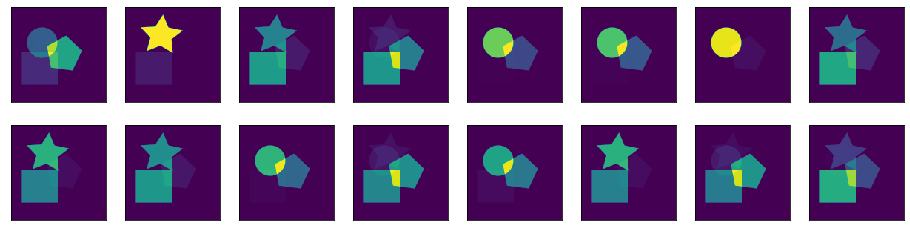

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


# Plot some random mixed images
_, a = plt.subplots(2, 8, figsize=(16, 4))

for i in range(2):
    for j in range(8):
        a[i][j].set_xticks([])
        a[i][j].set_yticks([])
        s = int(np.sqrt(X.shape[1]))
        a[i][j].imshow(X[np.random.randint(num_images)].reshape((s, s)))

plt.show()

**BSS with non-negative ICA (suboptimal)**

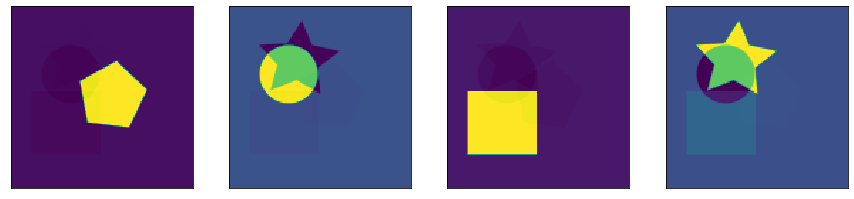

In [5]:
num_sources = 4
S, A = nica(X, num_sources)

# Plot recovered sources
_, a = plt.subplots(1, num_sources, figsize=(15, 15))

for i in range(num_sources):
    a[i].set_xticks([])
    a[i].set_yticks([])
    d = int(np.sqrt(S.shape[1]))
    a[i].imshow(S[i].reshape((d, d)))

plt.show()

**BSS with NMF**

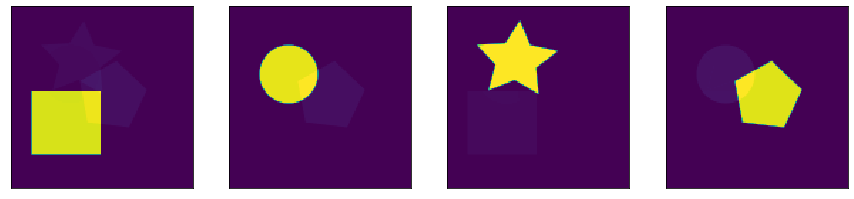

In [6]:
num_components = 4
nmf = NMF(n_components=num_components)

S = nmf.fit_transform(X.transpose()).transpose()
A = nmf.components_.transpose()

# Plot recovered sources
_, a = plt.subplots(1, num_components, figsize=(15, 15))

for i in range(num_components):
    a[i].set_xticks([])
    a[i].set_yticks([])
    d = int(np.sqrt(S.shape[1]))
    a[i].imshow(S[i].reshape((d, d)))

plt.show()

**BSS with NICA-NMF**

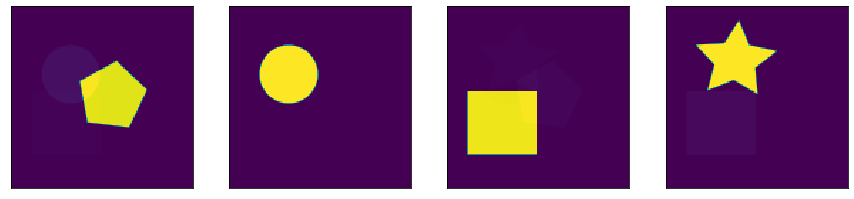

In [7]:
num_components = 4
S, A = nica_nmf(X, num_components)

# Plot recovered sources
_, a = plt.subplots(1, num_components, figsize=(15, 15))

for i in range(num_components):
    a[i].set_xticks([])
    a[i].set_yticks([])
    d = int(np.sqrt(S.shape[1]))
    a[i].imshow(S[i].reshape((d, d)))

plt.show()

**Load and mix the sources of example 2**

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Original sources
s1 = cv2.imread('data/example2_baboon', 0)
s2 = cv2.imread('data/example2_cameraman', 0)
s3 = cv2.imread('data/example2_lena', 0)
s4 = cv2.imread('data/example2_mona', 0)
s5 = cv2.imread('data/example2_texture', 0)

S = np.array([
    s1.flatten(),
    s2.flatten(),
    s3.flatten(),
    s4.flatten(),
    s5.flatten()
])
S = S.astype(np.float) / 255

# Mixing matrix
A = np.random.rand(5, 5)

# Observations
X = np.matmul(A, S)

x1 = X[0].reshape((256, 256))
x2 = X[1].reshape((256, 256))
x3 = X[2].reshape((256, 256))
x4 = X[3].reshape((256, 256))
x5 = X[4].reshape((256, 256))

**Show the mixed observed signals**

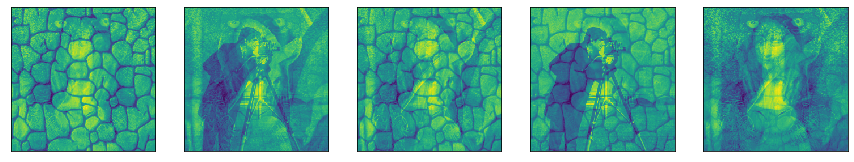

In [9]:
# Plot mixed images
_, a = plt.subplots(1, 5, figsize=(15, 15))

for i in range(5):
    a[i].set_xticks([])
    a[i].set_yticks([])

a[0].imshow(x1)
a[1].imshow(x2)
a[2].imshow(x3)
a[3].imshow(x4)
a[4].imshow(x5)

plt.show()

**BSS with non-negative ICA**

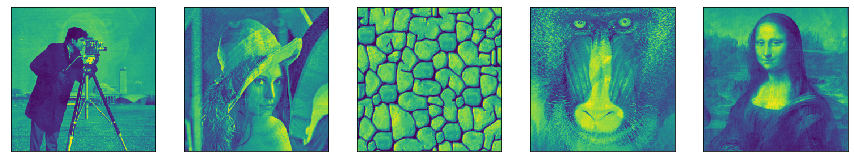

In [10]:
S, A = nica(X, 5, lr=0.1, max_iter=10000)

# Recovered sources
s1 = S[0].reshape((256, 256))
s2 = S[1].reshape((256, 256))
s3 = S[2].reshape((256, 256))
s4 = S[3].reshape((256, 256))
s5 = S[4].reshape((256, 256))

# Plot recovered sources
_, a = plt.subplots(1, 5, figsize=(15, 15))

for i in range(5):
    a[i].set_xticks([])
    a[i].set_yticks([])

a[0].imshow(s1)
a[1].imshow(s2)
a[2].imshow(s3)
a[3].imshow(s4)
a[4].imshow(s5)

plt.show()

**BSS with NMF (suboptimal)**

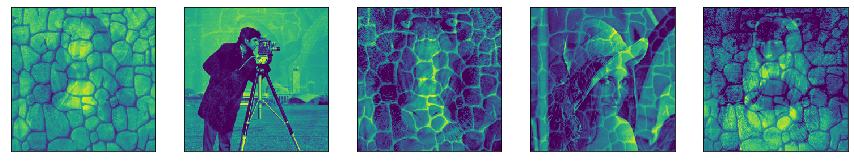

In [11]:
num_components = 5
nmf = NMF(n_components=num_components)

S = nmf.fit_transform(X.transpose()).transpose()
A = nmf.components_.transpose()

# Plot recovered sources
_, a = plt.subplots(1, num_components, figsize=(15, 15))

for i in range(num_components):
    a[i].set_xticks([])
    a[i].set_yticks([])
    d = int(np.sqrt(S.shape[1]))
    a[i].imshow(S[i].reshape((d, d)))

plt.show()

**BSS with NICA-NMF**

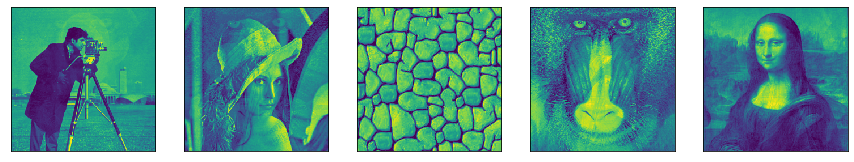

In [12]:
S, A = nica_nmf(X, 5, lr=0.1, max_iter=10000)

# Recovered sources
s1 = S[0].reshape((256, 256))
s2 = S[1].reshape((256, 256))
s3 = S[2].reshape((256, 256))
s4 = S[3].reshape((256, 256))
s5 = S[4].reshape((256, 256))

# Plot recovered sources
_, a = plt.subplots(1, 5, figsize=(15, 15))

for i in range(5):
    a[i].set_xticks([])
    a[i].set_yticks([])

a[0].imshow(s1)
a[1].imshow(s2)
a[2].imshow(s3)
a[3].imshow(s4)
a[4].imshow(s5)

plt.show()